# Анализ данных о продажах игр в интернет-магазине "Стримчик"

Доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы. Необходимо выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

План:
- импортирование библиотек;
- предобработка данных;
- исследовательский анализ данных;
- составление портрета пользователя каждого региона;
- проверка гипотез;
- итоговый вывод.

# 1. Импортирование библиотек

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats as st

In [ ]:
data = pd.read_csv('/datasets/games.csv')
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


ВЫВОД:

Изучили общую информацию. Название колонок имеют нарушение стилей. В колонках присутствует неверные типы данных. Данных достаточно для проведения исследования.

# 2. Предобработка данных

In [ ]:
data.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

In [ ]:
data.columns = data.columns.str.lower()

In [ ]:
data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

In [ ]:
data.duplicated(['name', 'platform', 'year_of_release']).sum()

2

In [ ]:
data = data.drop_duplicates(['name', 'platform', 'year_of_release'])

In [ ]:
data.duplicated(['name', 'platform', 'year_of_release']).sum()

0

In [ ]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [ ]:
(data['name'].isna().mean()*100).round(3)

0.006

In [ ]:
data = data.dropna(subset=['name'])

In [ ]:
data.isna().sum()

name                  0
platform              0
year_of_release     269
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         6699
rating             6764
dtype: int64

In [ ]:
(data['year_of_release'].isnull().sum()/len(data['name'])*100).round(3)

1.61

In [ ]:
data = data.dropna(subset=['year_of_release'])

In [ ]:
data.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         6605
rating             6676
dtype: int64

In [ ]:
(data['critic_score'].isnull().sum()/len(data['name'])*100).round(3)

51.457

In [ ]:
data = data.dropna(subset=['critic_score'])

In [ ]:
data.isna().sum()

name                0
platform            0
year_of_release     0
genre               0
na_sales            0
eu_sales            0
jp_sales            0
other_sales         0
critic_score        0
user_score         33
rating             81
dtype: int64

In [ ]:
(data['user_score'].isnull().sum()/len(data['name'])*100).round(3)

0.413

In [ ]:
data = data.dropna(subset=['user_score'])

In [ ]:
data.isna().sum()

name                0
platform            0
year_of_release     0
genre               0
na_sales            0
eu_sales            0
jp_sales            0
other_sales         0
critic_score        0
user_score          0
rating             72
dtype: int64

In [ ]:
(data['rating'].isna().sum()/len(data['name'])*100).round(3)

0.906

In [ ]:
data = data.dropna(subset=['rating'])

In [ ]:
data.isna().sum()

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7877 entries, 0 to 16702
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             7877 non-null   object 
 1   platform         7877 non-null   object 
 2   year_of_release  7877 non-null   float64
 3   genre            7877 non-null   object 
 4   na_sales         7877 non-null   float64
 5   eu_sales         7877 non-null   float64
 6   jp_sales         7877 non-null   float64
 7   other_sales      7877 non-null   float64
 8   critic_score     7877 non-null   float64
 9   user_score       7877 non-null   object 
 10  rating           7877 non-null   object 
dtypes: float64(6), object(5)
memory usage: 738.5+ KB


In [ ]:
data['year_of_release'] = data['year_of_release'].astype('int')

In [ ]:
data['critic_score'] = data['critic_score'].astype('int')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7877 entries, 0 to 16702
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             7877 non-null   object 
 1   platform         7877 non-null   object 
 2   year_of_release  7877 non-null   int64  
 3   genre            7877 non-null   object 
 4   na_sales         7877 non-null   float64
 5   eu_sales         7877 non-null   float64
 6   jp_sales         7877 non-null   float64
 7   other_sales      7877 non-null   float64
 8   critic_score     7877 non-null   int64  
 9   user_score       7877 non-null   object 
 10  rating           7877 non-null   object 
dtypes: float64(4), int64(2), object(5)
memory usage: 738.5+ KB


In [ ]:
data['total_sales'] = data.loc[:,['na_sales','eu_sales','jp_sales','other_sales']].sum(axis=1)

In [ ]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8,E,82.54
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8,E,32.77
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58,6.6,E,28.91


ВЫВОД:

Привели названия к общему формату. Удалили строки с неявными дубликатами. Удалили прропуски. Привели столбцы year_of_release и critic_score приведены к типу int. Столбец user_score к типу float.

# 3. Исследовательский анализ данных

3.1. Исследование выпуска игр по годам

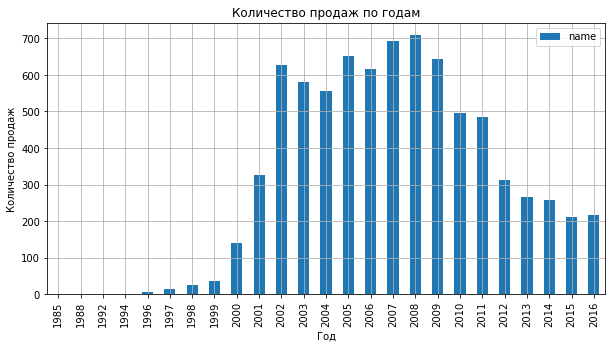

In [ ]:
(
    data
    .pivot_table(index='year_of_release', values='name', aggfunc='count')
    .plot(kind='bar', grid=True, figsize=(10,5))
)
plt.title('Количество продаж по годам')
plt.xlabel('Год')
plt.ylabel('Количество продаж')
plt.show()

In [ ]:
data[data['year_of_release'] > -1]['year_of_release'].describe()

count    7877.000000
mean     2007.158690
std         4.157202
min      1985.000000
25%      2004.000000
50%      2007.000000
75%      2010.000000
max      2016.000000
Name: year_of_release, dtype: float64

На графике представлены игры 1985-2016 года выпуска. Рост числа выпуска игр приходится на период с 1996 по 2008. Пик продаж пришёлся на 2008 год. Затем наблюдается спад вплоть до 2016 года.

3.2. Исследование продаж по платформам

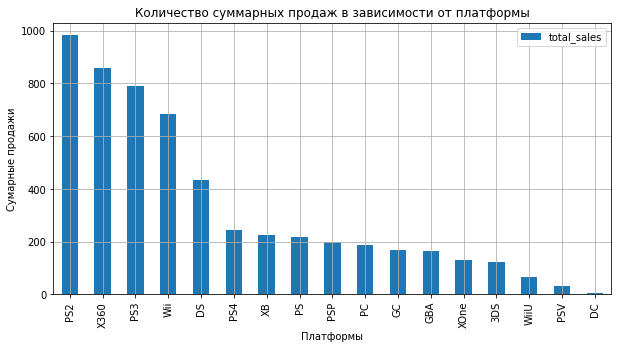

In [ ]:
(
    data.pivot_table(index='platform', values='total_sales', aggfunc='sum')
    .sort_values(by='total_sales',ascending=False)
    .plot(kind='bar', grid=True, figsize=(10,5))
)
plt.title('Количество суммарных продаж в зависимости от платформы')
plt.xlabel('Платформы')
plt.ylabel('Сумарные продажи')
plt.show()

In [ ]:
top_sales = (
    data.pivot_table(index='platform', values='total_sales', aggfunc='sum')
    .sort_values(by='total_sales', ascending=False)
    .reset_index()
    .head(6)['platform']
    .tolist()
)

In [ ]:
print(top_sales)

['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS4']


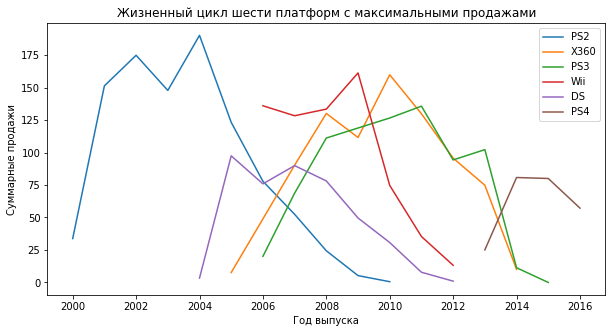

In [ ]:
for name in top_sales:
    (
    data.query('platform == @name and year_of_release > -1')
    .pivot_table(index = 'year_of_release', values = 'total_sales', aggfunc = 'sum')
    .sort_values('year_of_release', ascending = False)['total_sales']
    .plot(figsize = (10, 5), label=name)
    )
    plt.title('Жизненный цикл шести платформ с максимальными продажами')
    plt.xlabel('Год выпуска')
    plt.ylabel('Суммарные продажи')
    plt.legend()

In [ ]:
print(data.query('platform == "DS" and year_of_release < 1990'))

Empty DataFrame
Columns: [name, platform, year_of_release, genre, na_sales, eu_sales, jp_sales, other_sales, critic_score, user_score, rating, total_sales]
Index: []


In [ ]:
time_life = data.pivot_table(index='platform', values='year_of_release', aggfunc=['min', 'max']).reset_index()
time_life['life'] = time_life['max'] - time_life['min'] + 1

In [ ]:
print('Медианное значение жизненного цикла по всей выборке', time_life['life'].median(), 'лет')

Медианное значение жизненного цикла по всей выборке 7.0 лет


In [ ]:
t = np.ceil(time_life['life'].median()/2)
print('Определим актуальный период за последние', t, 'года')

Определим актуальный период за последние 4.0 года


3.3. Исследование перспективных платформ

In [ ]:
actual_platforms = (data
    .query('year_of_release >= 2016-@t')
    .pivot_table(index='platform', values='total_sales', aggfunc='sum')
    .sort_values(by='total_sales', ascending=False)
    .reset_index().head(10)['platform'].tolist()
    )
print(actual_platforms)

['PS4', 'PS3', 'X360', 'XOne', '3DS', 'WiiU', 'PC', 'PSV', 'Wii', 'DS']


In [ ]:
actual_data = data.query('year_of_release >= 2016-@t').copy().reset_index(drop= True)
actual_data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97,8.2,M,21.05
1,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97,8.1,M,16.27
2,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83,5.3,M,13.79
3,Call of Duty: Black Ops II,X360,2012,Shooter,8.25,4.24,0.07,1.12,83,4.8,M,13.68
4,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97,8.3,M,12.62


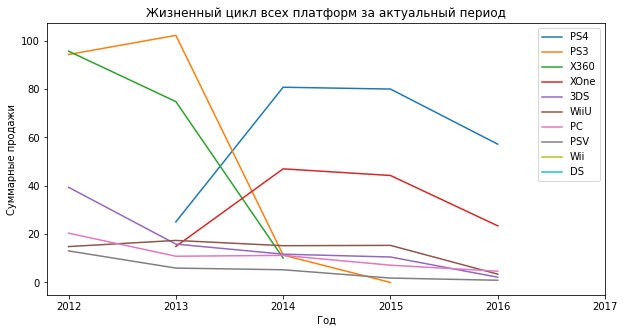

In [ ]:
for name in actual_platforms:
    (
    actual_data.query('platform == @name')
    .pivot_table(index = 'year_of_release', values = 'total_sales', aggfunc = 'sum')
    .sort_values('year_of_release', ascending = False)['total_sales']
    .plot(kind='line', figsize = (10, 5), label=name)
    )
    plt.title('Жизненный цикл всех платформ за актуальный период')
    plt.xticks(np.arange(2012, 2018, step=1))
    plt.xlabel('Год')
    plt.ylabel('Суммарные продажи')
    plt.legend()

Из графика видно, что на 2016 год лидирующими консолями являются PS4 и XOne, хотя как и у всех наблюдается уменьшение продаж.

3.4. «Ящик с усами» по глобальным продажам игр в разбивке по платформам актуального периода.

Text(0, 0.5, 'Продажи по платформам')

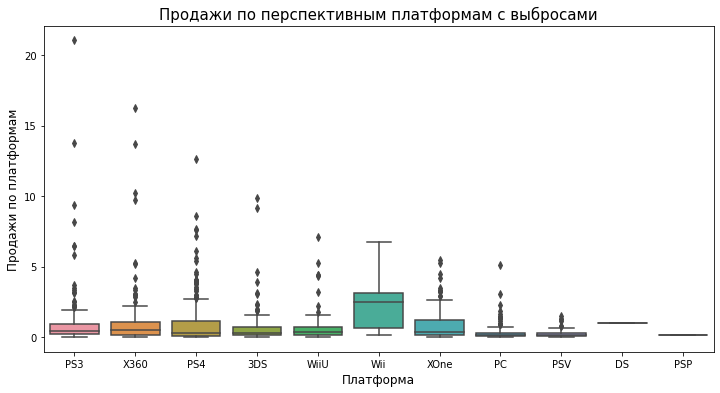

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(data=actual_data, x='platform', y='total_sales')
plt.title('Продажи по перспективным платформам с выбросами', fontsize=15)
plt.xlabel('Платформа', fontsize=12)
plt.ylabel('Продажи по платформам',fontsize=12)


In [ ]:
actual_data['total_sales'].describe()

count    1265.000000
mean        0.792798
std         1.541329
min         0.010000
25%         0.110000
50%         0.300000
75%         0.840000
max        21.050000
Name: total_sales, dtype: float64

Text(0, 0.5, 'Продажи по платформам')

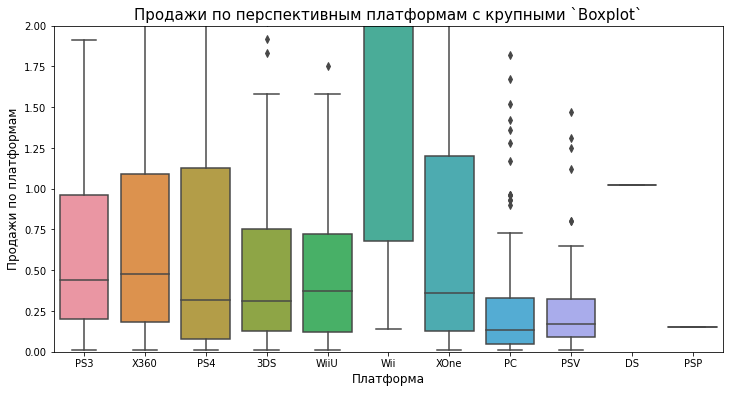

In [ ]:
plt.figure(figsize=(12,6))
ax = sns.boxplot(data=actual_data, x='platform', y='total_sales')
ax.set(ylim=(0,2))
plt.title('Продажи по перспективным платформам с крупными `Boxplot`', fontsize=15)
plt.xlabel('Платформа', fontsize=12)
plt.ylabel('Продажи по платформам',fontsize=12)

По всем консолям присутствуют выбросы по продажам.

3.6 Исследование распределения игр по жанрам

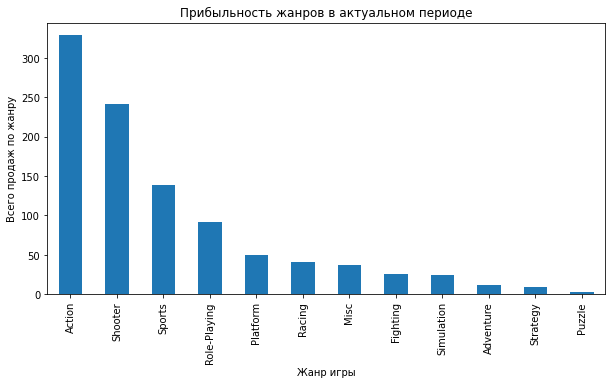

In [ ]:
(actual_data
 .pivot_table(index='genre', values='total_sales', aggfunc='sum')
 .sort_values('total_sales', ascending=False)
 .plot(kind='bar', y='total_sales', figsize=(10, 5), legend=False,title = 'Прибыльность жанров в актуальном периоде')
 .set(xlabel='Жанр игры', ylabel='Всего продаж по жанру'))

plt.show()

Text(0, 0.5, 'Продажи по жанрам')

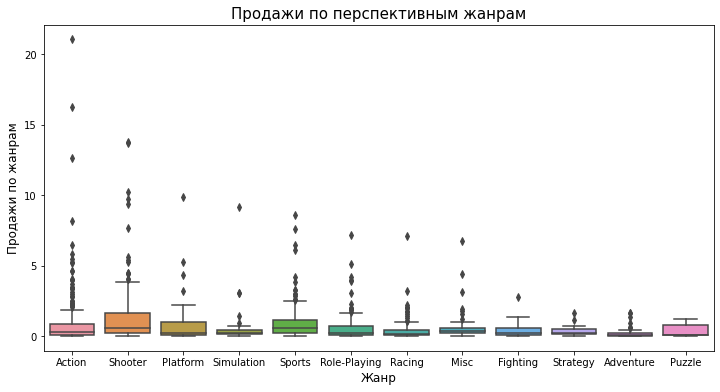

In [ ]:
plt.figure(figsize=(12,6))
ax = sns.boxplot(data=actual_data, x='genre', y='total_sales')
plt.title('Продажи по перспективным жанрам', fontsize=15)
plt.xlabel('Жанр', fontsize=12)
plt.ylabel('Продажи по жанрам',fontsize=12)

Text(0, 0.5, 'Продажи по жанрам')

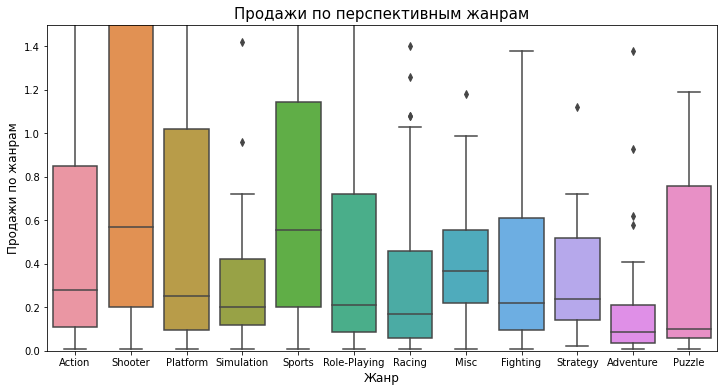

In [ ]:
plt.figure(figsize=(12,6))
ax = sns.boxplot(data=actual_data, x='genre', y='total_sales')
ax.set(ylim=(0,1.5))
plt.title('Продажи по перспективным жанрам', fontsize=15)
plt.xlabel('Жанр', fontsize=12)
plt.ylabel('Продажи по жанрам',fontsize=12)

In [ ]:
(
 actual_data
 .pivot_table(index='genre', values='total_sales', aggfunc='median')
 .sort_values('total_sales', ascending=False)
)

,total_sales
genre,
Shooter,0.570
Sports,0.555
Misc,0.365
Action,0.280
Platform,0.250
Strategy,0.240
Fighting,0.220
Role-Playing,0.210
Simulation,0.200


ВЫВОД:

За последние четыре года наиболее востребованными являются Action, Shooter.
Дополнительное исследование и сравнение медианных значений по продажам в разрезе жанров указывает, что предпочтение в жанрах надо отдавать Shooter, Sports обладающих большим медианным значением прибыли.

# 4. Составим портрет пользователя каждого региона

4.1. Топ-5 самых популярных платформ по регионам

In [ ]:
na = (
      actual_data
        .pivot_table(index=['platform'], values=['na_sales'], aggfunc='sum')
        .sort_values('na_sales', ascending=False).reset_index()
     )
na.loc[5:,'platform'] = 'Other'
na.loc[5,'na_sales'] =  na.loc[5:,'na_sales'].sum().round(2)
na = na.iloc[0:6, :]
eu = (
      actual_data
        .pivot_table(index=['platform'], values=['eu_sales'], aggfunc='sum')
        .sort_values('eu_sales', ascending=False).reset_index()
     )
eu.loc[5:,'platform'] = 'Other'
eu.loc[5,'eu_sales'] =  eu.loc[5:,'eu_sales'].sum().round(2)
eu = eu.iloc[0:6, :]
jp = (
      actual_data
        .pivot_table(index=['platform'], values=['jp_sales'], aggfunc='sum')
        .sort_values('jp_sales', ascending=False).reset_index()
     )
jp.loc[5:,'platform'] = 'Other'
jp.loc[5,'jp_sales'] =  jp.loc[5:,'jp_sales'].sum().round(2)
jp = jp.iloc[0:6, :]
ps = pd.merge(na, eu, left_index=True, right_index=True)
ps = pd.merge(ps, jp, left_index=True, right_index=True)
ps.rename(columns = {'platform_x':'na_platform', 'platform_y':'eu_platform', 'platform':'jp_platform'}, inplace = True )

ps

,na_platform,na_sales,eu_platform,eu_sales,jp_platform,jp_sales
0,X360,106.82,PS4,111.78,3DS,26.60
1,PS4,84.20,PS3,78.30,PS3,20.29
2,PS3,76.97,X360,57.00,WiiU,10.17
3,XOne,75.64,XOne,42.09,PS4,9.29
4,WiiU,30.78,PC,31.51,PSV,7.05
5,Other,62.41,Other,52.24,Other,3.28


In [ ]:
data = {'region': ['NA - Америка', 'EU - Европа', 'JP - Япония'], 'platform': ['na_platform', 'eu_platform', 'jp_platform'], 'sales': ['na_sales', 'eu_sales', 'jp_sales']}
regions = pd.DataFrame(data)
regions

,region,platform,sales
0,NA - Америка,na_platform,na_sales
1,EU - Европа,eu_platform,eu_sales
2,JP - Япония,jp_platform,jp_sales


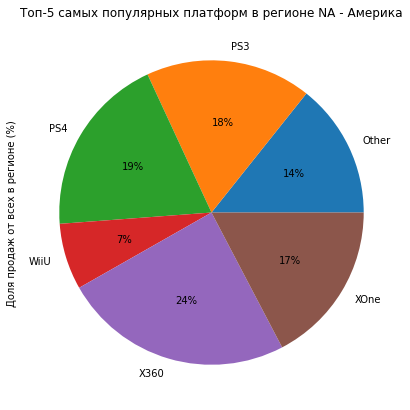

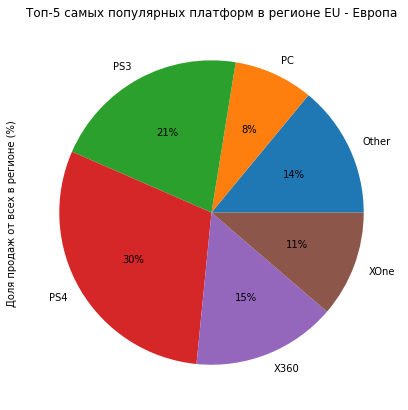

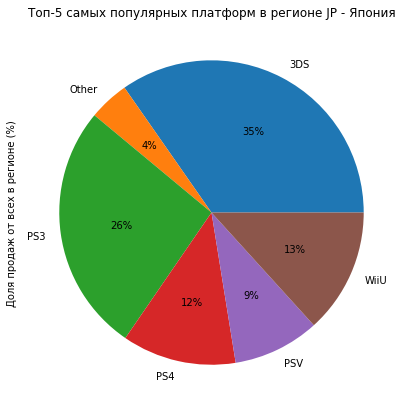

In [ ]:
for i in regions.index :
    name = regions['region'][i]
    (ps.pivot_table(index=regions['platform'][i], values=regions['sales'][i], aggfunc='sum')
     .plot(kind='pie', y=regions['sales'][i], autopct='%1.0f%%', figsize=(7, 7), legend=False)
     .set(ylabel='Доля продаж от всех в регионе (%)')
    )
    plt.title(f'Топ-5 самых популярных платформ в регионе {name}')
    plt.show()

Выяснилось что пользователи по регионам в основном используют платформы в соответствии с долями указанными в таблице выше.
В топ в регионах NA и EU входят одинаковые платформы с перестановкой их предпочтения.
На на рынке JP присутствуют специализированные региональные платформы.

4.2. Топ-5 самых популярных жанров по регионам

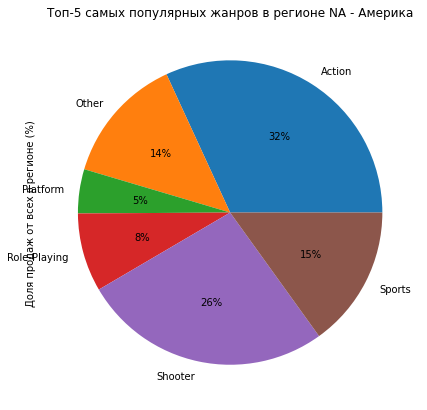

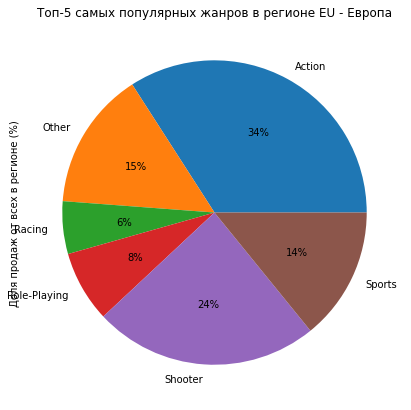

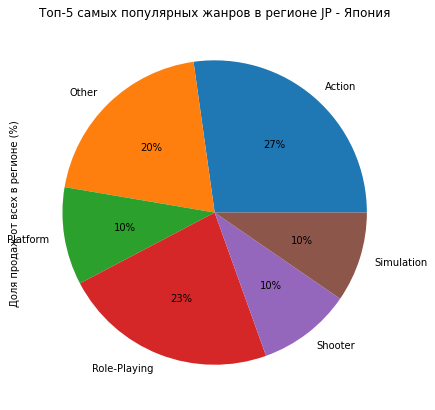

In [ ]:
na = (
      actual_data
        .pivot_table(index=['genre'], values=['na_sales'], aggfunc='sum')
        .sort_values('na_sales', ascending=False).reset_index()
     )
na.loc[5:,'genre'] = 'Other'
na.loc[5,'na_sales'] =  na.loc[5:,'na_sales'].sum().round(2)
na = na.iloc[0:6, :]
eu = (
      actual_data
        .pivot_table(index=['genre'], values=['eu_sales'], aggfunc='sum')
        .sort_values('eu_sales', ascending=False).reset_index()
     )
eu.loc[5:,'genre'] = 'Other'
eu.loc[5,'eu_sales'] =  eu.loc[5:,'eu_sales'].sum().round(2)
eu = eu.iloc[0:6, :]
jp = (
      actual_data
        .pivot_table(index=['genre'], values=['jp_sales'], aggfunc='sum')
        .sort_values('jp_sales', ascending=False).reset_index()
     )
jp.loc[5:,'genre'] = 'Other'
jp.loc[5,'jp_sales'] =  jp.loc[5:,'jp_sales'].sum().round(2)
jp = jp.iloc[0:6, :]
gs = pd.merge(na, eu, left_index=True, right_index=True)
gs = pd.merge(gs, jp, left_index=True, right_index=True)
gs.rename(columns = {'genre_x':'na_genre', 'genre_y':'eu_genre', 'genre':'jp_genre'}, inplace = True )

data = {'region': ['NA - Америка', 'EU - Европа', 'JP - Япония'], 'genre': ['na_genre', 'eu_genre', 'jp_genre'], 'sales': ['na_sales', 'eu_sales', 'jp_sales']}
regions = pd.DataFrame(data)

for i in regions.index :
    name = regions['region'][i]
    (gs.pivot_table(index=regions['genre'][i], values=regions['sales'][i], aggfunc='sum')
     .plot(kind='pie', y=regions['sales'][i], autopct='%1.0f%%', figsize=(7, 7), legend=False)
     .set(ylabel='Доля продаж от всех в регионе (%)')
    )
    plt.title(f'Топ-5 самых популярных жанров в регионе {name}')
    plt.show()

Выяснилось что пользователи по регионам предпочитают жанры игр в соответствии с долями указанными в таблице выше. В топ в регионах NA и EU входят одинаковые жанры почти с одинаковым распределением.

4.3. Влияние рейтинга ESRB на продажи в регионах

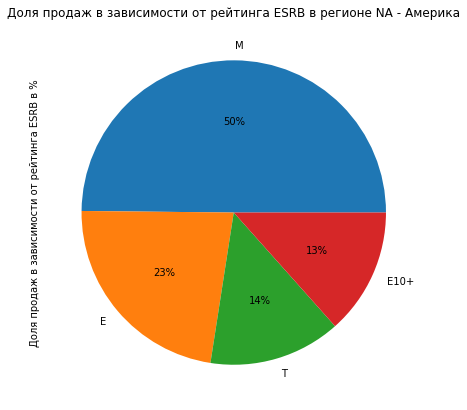

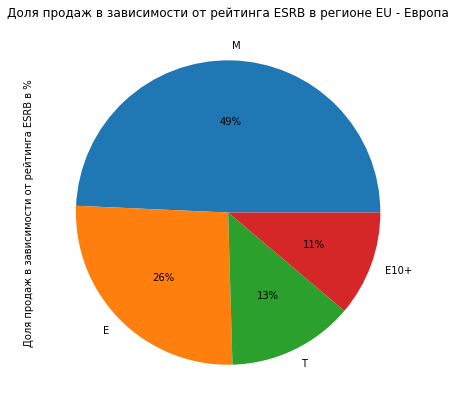

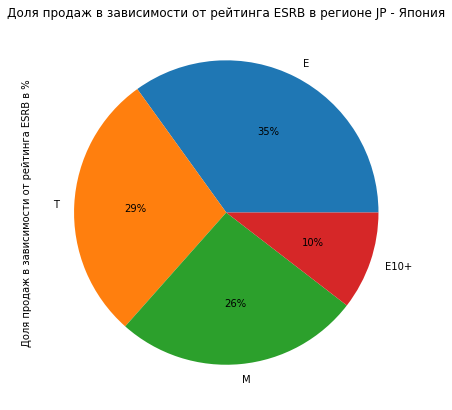

In [ ]:
regions = ['na_sales', 'eu_sales', 'jp_sales']

for region in regions:
    if region == 'na_sales':
        name = 'NA - Америка'
    elif region == 'eu_sales':
        name = 'EU - Европа'
    else:
        name = 'JP - Япония'
    (actual_data.pivot_table(index='rating', values=region, aggfunc='sum')
     .sort_values(region, ascending=False)
     .plot(kind='pie', y=region, autopct='%1.0f%%', figsize=(7, 7), legend=False, title = region)
     .set(ylabel='Доля продаж в зависимости от рейтинга ESRB в %')
    )
    plt.title(f'Доля продаж в зависимости от рейтинга ESRB в регионе {name}')
    plt.show()

ВЫВОД:

В регионах NA и EU большая часть продаж приходится на рейтинг "M", на втором месте игры с рейтингом "E". В регионах JP ситуация иная, большая часть продаж приходится на "E". на втором месте "T".

# 5. Проверим гипотезы

5.1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

In [ ]:
xone_var = st.variation(actual_data.query('platform == "xone"')['user_score'])
pc_var = st.variation(actual_data.query('platform == "pc"')['user_score'])
print('Равны ли дисперсии двух совокупностей?',(xone_var * 0.05 < abs(xone_var - pc_var)))

Равны ли дисперсии двух совокупностей? False


In [ ]:
alpha = 0.05

result_first = st.ttest_ind(actual_data.query('platform == "xone"')['user_score'],
                            actual_data.query('platform == "pc"')['user_score'])

prob_first = result_first.pvalue
print('р-значение: ',prob_first)
if prob_first < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

р-значение:  nan
Не получилось отвергнуть нулевую гипотезу


Не получилось отвергнуть нулевую гипотезу, есть основания утверждать, что рейтинги платформ XOne и PC равны, при установленном уровне значимости в 5 %.

5.2. Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

In [ ]:
action_var = st.variation(actual_data.query('genre == "action"')['user_score'])
sports_var = st.variation(actual_data.query('genre == "sports"')['user_score'])
print('Равны ли дисперсии двух совокупностей?',(((action_var * 0.05) < abs(action_var - sports_var))))


Равны ли дисперсии двух совокупностей? False


In [ ]:
result_second = st.ttest_ind(actual_data.query('genre == "action"')['user_score'],
                             actual_data.query('genre == "sports"')['user_score'],
                             equal_var=False)
prob_second = result_first.pvalue
print('р-значение: ',prob_second)
if prob_second < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

р-значение:  nan
Не получилось отвергнуть нулевую гипотезу


Не получилось отвергнуть нулевую гипотезу.Есть основания утверждать, что рейтинги жанров Action и Sports равны, при установленном уровне значимости в 5 %.

# Вывод

1. Изучили общую информацию о данных.
- название колонок имеют нарушение стилей;
- в колонках присутствует неверные типы данных;
- данных достаточно для проведения исследования.
2. Предобработка данных.
- привели названия к общему формату;
- удалили строки с неявными дубликатами;
- удалили прропуски;
- привели столбцы year_of_release и critic_score приведены к типу int;
- столбец user_score к типу float
3. Провели исследовательский анализ.
- На графике представлены игры 1985-2016 года выпуска. Рост числа выпуска игр приходится на период с 1996 по 2008. Пик продаж пришёлся на 2008 год. Затем наблюдается спад вплоть до 2016 года
- На 2016 год лидирующими консолями являются PS4 и XOne, хотя как и у всех наблюдается уменьшение продаж.
- По всем консолям присутствуют выбросы по продажам
- За последние четыре года наиболее востребованными являются Action, Shooter. Дополнительное исследование и сравнение медианных значений по продажам в разрезе жанров указывает, что предпочтение в жанрах надо отдавать Shooter, Sports обладающих большим медианным значением прибыли.
4. Составили портрет пользователя каждого региона.
- В топ в регионах NA и EU входят одинаковые платформы с перестановкой их предпочтения, но на рынке JP присутствуют специализированные региональные платформы.
- В топ в регионах NA и EU входят одинаковые жанры почти с одинаковым распределением.
- В регионах NA и EU большая часть продаж приходится на рейтинг "M", на втором месте игры с рейтингом "E". В регионах JP ситуация иная, большая часть продаж приходится на "E". на втором месте "T".
5. Проверили гипотезы.
- Не получилось отвергнуть нулевую гипотезу, есть основания утверждать, что рейтинги платформ XOne и PC равны, при установленном уровне значимости в 5 %.
- Не получилось отвергнуть нулевую гипотезу.Есть основания утверждать, что рейтинги жанров Action и Sports равны, при установленном уровне значимости в 5 %.